In [1]:
pip install fastf1 pandas matplotlib seaborn fastapi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.7 MB/s eta 0:00:00


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

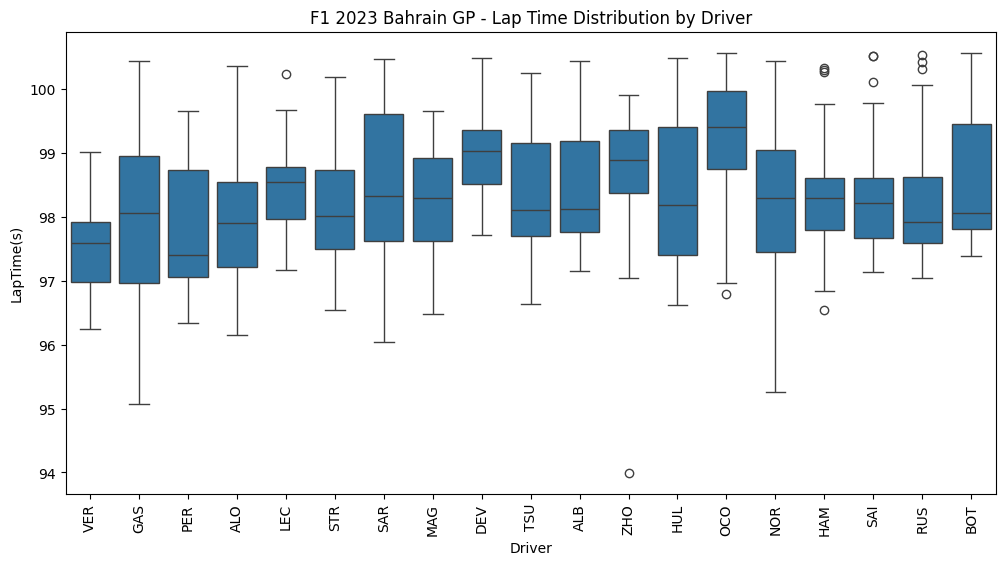

✅ Data extraction complete. CSV files saved.


In [2]:
# Formula 1 Data Extraction using FastF1

# Step 1: Install dependencies if not installed
try:
    import fastf1
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os  # Ensure cache directory exists
except ModuleNotFoundError:
    print("Error: Required module not found. Install dependencies using:")
    print("!pip install fastf1 pandas matplotlib seaborn")
    raise SystemExit("Stopping execution due to missing dependencies.")

# Step 2: Ensure Cache Directory Exists
cache_dir = "f1_cache"
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)  # Create directory if it doesn't exist

# Step 3: Enable Cache for Faster Data Retrieval
fastf1.Cache.enable_cache(cache_dir)

# Step 4: Load Race Data (Example: 2023 Bahrain GP)
race = fastf1.get_session(2023, 'Bahrain', 'R')  # 'R' means Race session
race.load()

# Step 5: Extract Lap Times & Driver Data
lap_data = race.laps.pick_quicklaps()  # Filter only clean lap times
driver_stints = race.laps[['Driver', 'LapTime', 'Compound', 'TyreLife', 'LapNumber']]

# Step 6: Convert Lap Time to Seconds
lap_data['LapTime(s)'] = lap_data['LapTime'].dt.total_seconds()

# Step 7: Visualizing Lap Times
plt.figure(figsize=(12, 6))
sns.boxplot(x='Driver', y='LapTime(s)', data=lap_data)
plt.xticks(rotation=90)
plt.title('F1 2023 Bahrain GP - Lap Time Distribution by Driver')
plt.show()

# Step 8: Save Data for Further Processing
lap_data.to_csv('f1_bahrain_gp_laps.csv', index=False)
driver_stints.to_csv('f1_bahrain_driver_stints.csv', index=False)

print("✅ Data extraction complete. CSV files saved.")


In [3]:
import pandas as pd

# Load extracted F1 race data
lap_data = pd.read_csv('f1_bahrain_gp_laps.csv')
stint_data = pd.read_csv('f1_bahrain_driver_stints.csv')

# Display first few rows
print(lap_data.head())
print(stint_data.head())


                     Time Driver  DriverNumber                 LapTime  \
0  0 days 01:04:15.961000    VER             1  0 days 00:01:39.019000   
1  0 days 01:05:53.935000    VER             1  0 days 00:01:37.974000   
2  0 days 01:07:31.941000    VER             1  0 days 00:01:38.006000   
3  0 days 01:09:09.917000    VER             1  0 days 00:01:37.976000   
4  0 days 01:10:47.952000    VER             1  0 days 00:01:38.035000   

   LapNumber  Stint  PitOutTime PitInTime             Sector1Time  \
0        1.0    1.0         NaN       NaN                     NaN   
1        2.0    1.0         NaN       NaN  0 days 00:00:31.342000   
2        3.0    1.0         NaN       NaN  0 days 00:00:31.388000   
3        4.0    1.0         NaN       NaN  0 days 00:00:31.271000   
4        5.0    1.0         NaN       NaN  0 days 00:00:31.244000   

              Sector2Time  ...             Team            LapStartTime  \
0  0 days 00:00:42.414000  ...  Red Bull Racing  0 days 01:02:36.

In [4]:
# Check for missing values
print("Lap Data Missing Values:\n", lap_data.isnull().sum())
print("\nStint Data Missing Values:\n", stint_data.isnull().sum())


Lap Data Missing Values:
 Time                    0
Driver                  0
DriverNumber            0
LapTime                 0
LapNumber               0
Stint                   0
PitOutTime            826
PitInTime             822
Sector1Time             2
Sector2Time             0
Sector3Time             0
Sector1SessionTime      6
Sector2SessionTime      0
Sector3SessionTime      0
SpeedI1               226
SpeedI2                 0
SpeedFL                 4
SpeedST               138
IsPersonalBest          0
Compound                0
TyreLife                0
FreshTyre               0
Team                    0
LapStartTime            0
LapStartDate            0
TrackStatus             0
Position                0
Deleted                 0
DeletedReason         809
FastF1Generated         0
IsAccurate              0
LapTime(s)              0
dtype: int64

Stint Data Missing Values:
 Driver       0
LapTime      1
Compound     0
TyreLife     0
LapNumber    0
dtype: int64


In [5]:
lap_data['PitOutTime'].fillna('NoPit', inplace=True)
lap_data['PitInTime'].fillna('NoPit', inplace=True)


<ipython-input-5-7bcbf75e00af>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lap_data['PitOutTime'].fillna('NoPit', inplace=True)
<ipython-input-5-7bcbf75e00af>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoPit' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  lap_data['PitOutTime'].fillna('NoPit', inplace=True)
<ipython-input-5-7bcbf75e00af>:2: FutureWarning: A value is trying to be set on a cop

In [6]:
# Convert timedelta columns to seconds
lap_data['Sector1Time'] = pd.to_timedelta(lap_data['Sector1Time']).dt.total_seconds()
lap_data['Sector1SessionTime'] = pd.to_timedelta(lap_data['Sector1SessionTime']).dt.total_seconds()



In [7]:
# Fill missing values using median for numerical columns
lap_data['Sector1Time'].fillna(lap_data['Sector1Time'].median(), inplace=True)
lap_data['Sector1SessionTime'].fillna(lap_data['Sector1SessionTime'].median(), inplace=True)


<ipython-input-7-2bab9ec4f4d0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lap_data['Sector1Time'].fillna(lap_data['Sector1Time'].median(), inplace=True)
<ipython-input-7-2bab9ec4f4d0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [8]:
lap_data['SpeedI1'].fillna(lap_data['SpeedI1'].median(), inplace=True)
lap_data['SpeedFL'].fillna(lap_data['SpeedFL'].median(), inplace=True)
lap_data['SpeedST'].fillna(lap_data['SpeedST'].median(), inplace=True)


<ipython-input-8-1da532bee86d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lap_data['SpeedI1'].fillna(lap_data['SpeedI1'].median(), inplace=True)
<ipython-input-8-1da532bee86d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [9]:
lap_data['DeletedReason'].fillna('NoDeletion', inplace=True)


<ipython-input-9-7b67e866fbea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lap_data['DeletedReason'].fillna('NoDeletion', inplace=True)


In [10]:
lap_data.to_csv('cleaned_f1_lap_data.csv', index=False)
stint_data.to_csv('cleaned_f1_stint_data.csv', index=False)

print("✅ Missing values handled successfully. Cleaned files saved!")


✅ Missing values handled successfully. Cleaned files saved!


In [11]:
# Selecting key features for analysis
lap_data = lap_data[['Driver', 'LapTime(s)', 'LapNumber', 'TyreLife', 'Compound',
                     'Sector1Time', 'Sector2Time', 'Sector3Time', 'TrackStatus']]


In [12]:
# Convert categorical values to numerical
compound_mapping = {'SOFT': 0, 'MEDIUM': 1, 'HARD': 2}
lap_data['Compound'] = lap_data['Compound'].map(compound_mapping)


In [13]:
# Convert time-based columns from timedelta format to seconds
time_columns = ['LapTime(s)', 'Sector1Time', 'Sector2Time', 'Sector3Time']

for col in time_columns:
    lap_data[col] = pd.to_timedelta(lap_data[col]).dt.total_seconds()


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
lap_data[['LapTime(s)', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife']] = scaler.fit_transform(
    lap_data[['LapTime(s)', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'TyreLife']]
)


In [15]:
# Create an Average Sector Time feature
lap_data['AvgSectorTime'] = (lap_data['Sector1Time'] + lap_data['Sector2Time'] + lap_data['Sector3Time']) / 3


In [16]:
# Create a Personal Best Lap flag
lap_data['PersonalBest'] = lap_data.groupby('Driver')['LapTime(s)'].cummin() == lap_data['LapTime(s)']
lap_data['PersonalBest'] = lap_data['PersonalBest'].astype(int)


In [17]:
lap_data.to_csv('engineered_f1_lap_data.csv', index=False)
print("✅ Feature Engineering complete. Data saved!")


✅ Feature Engineering complete. Data saved!


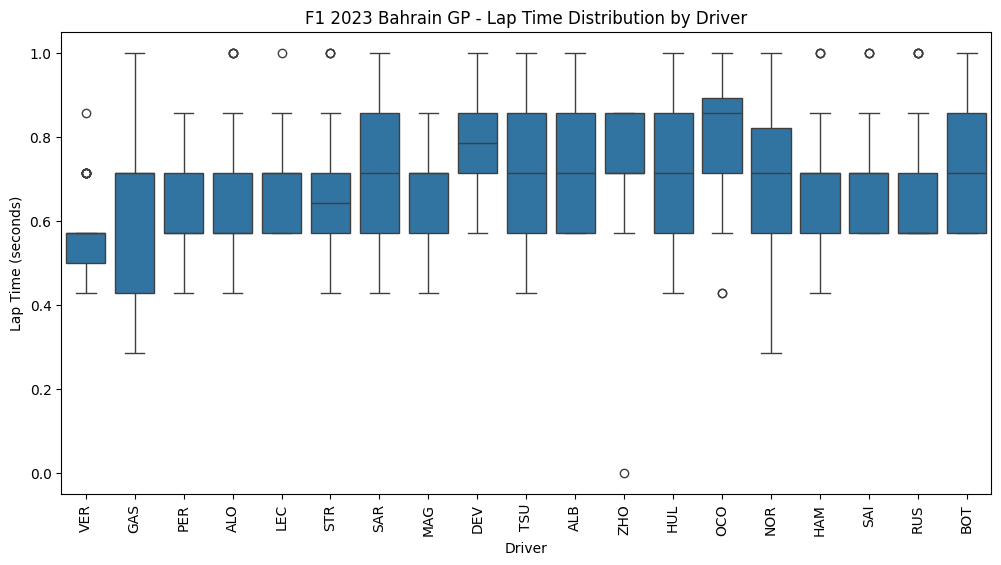

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Driver', y='LapTime(s)', data=lap_data)
plt.xticks(rotation=90)
plt.title('F1 2023 Bahrain GP - Lap Time Distribution by Driver')
plt.ylabel('Lap Time (seconds)')
plt.xlabel('Driver')
plt.show()


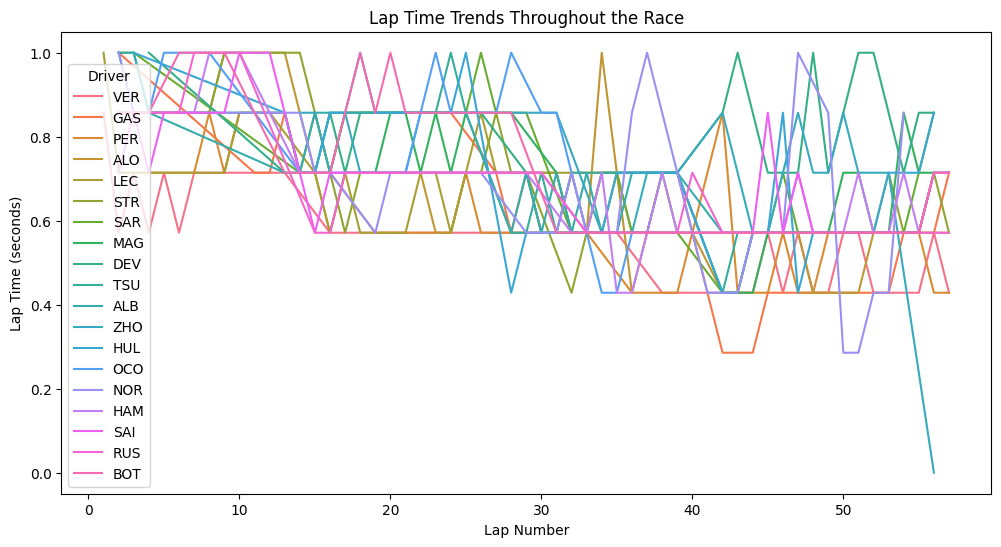

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='LapNumber', y='LapTime(s)', hue='Driver', data=lap_data)
plt.title('Lap Time Trends Throughout the Race')
plt.ylabel('Lap Time (seconds)')
plt.xlabel('Lap Number')
plt.show()


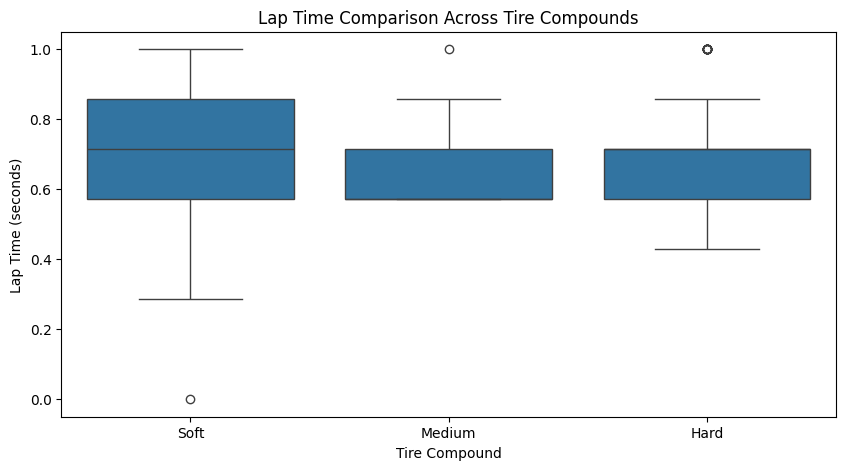

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Compound', y='LapTime(s)', data=lap_data)
plt.xticks([0, 1, 2], ['Soft', 'Medium', 'Hard'])
plt.title('Lap Time Comparison Across Tire Compounds')
plt.ylabel('Lap Time (seconds)')
plt.xlabel('Tire Compound')
plt.show()


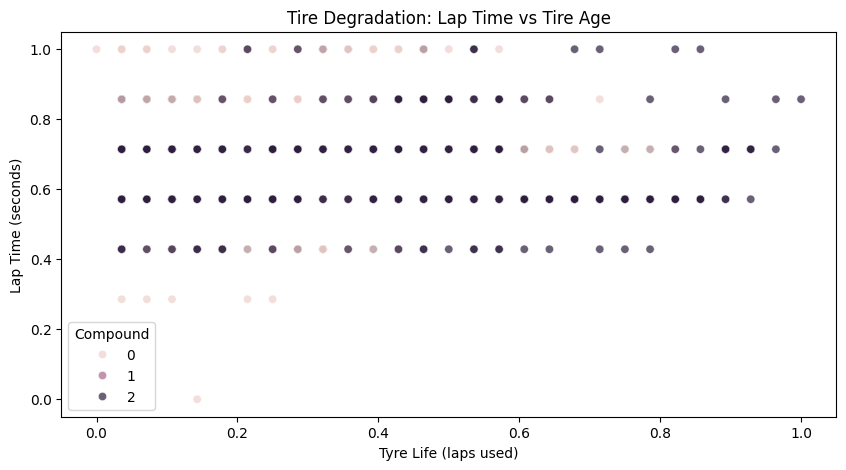

In [21]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TyreLife', y='LapTime(s)', hue='Compound', data=lap_data, alpha=0.7)
plt.title('Tire Degradation: Lap Time vs Tire Age')
plt.ylabel('Lap Time (seconds)')
plt.xlabel('Tyre Life (laps used)')
plt.show()


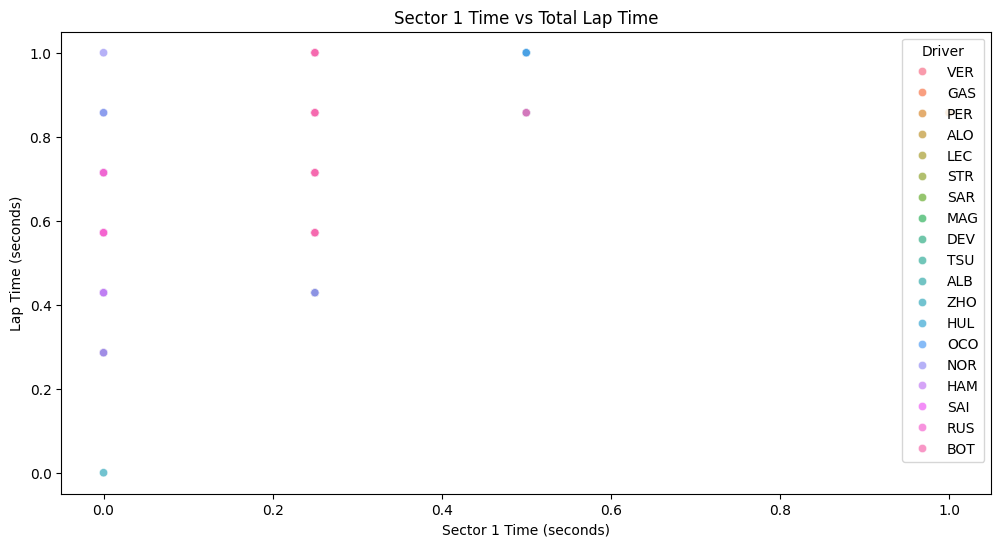

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sector1Time', y='LapTime(s)', hue='Driver', data=lap_data, alpha=0.7)
plt.title('Sector 1 Time vs Total Lap Time')
plt.ylabel('Lap Time (seconds)')
plt.xlabel('Sector 1 Time (seconds)')
plt.show()


In [23]:
# Selecting relevant features for Lap Time Prediction
features = ['LapNumber', 'TyreLife', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Compound']
target = 'LapTime(s)'

# Creating feature matrix X and target variable Y
X = lap_data[features]
y = lap_data[target]


In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")


Training Set: 660 samples
Testing Set: 166 samples


In [25]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict lap times on the test set
y_pred = model.predict(X_test)


In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f} seconds")
print(f"🔹 R² Score: {r2:.2f} (closer to 1 is better)")


Model Performance:
🔹 Mean Absolute Error (MAE): 0.04 seconds
🔹 R² Score: 0.88 (closer to 1 is better)


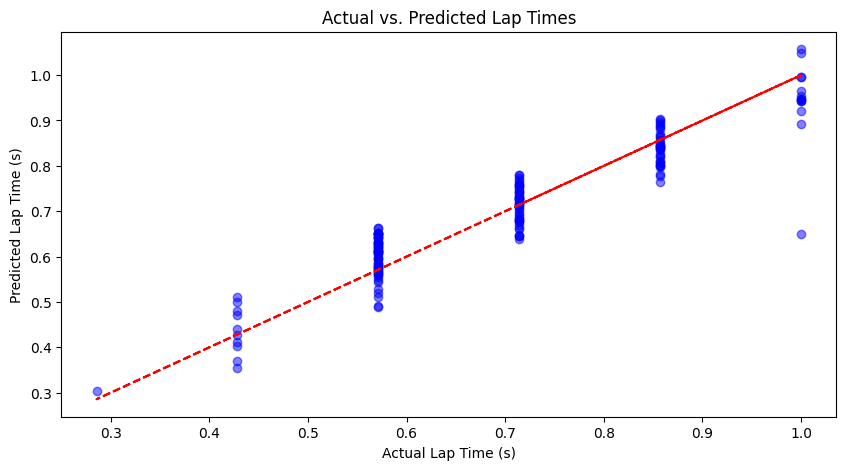

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='dashed')  # Perfect predictions line
plt.xlabel("Actual Lap Time (s)")
plt.ylabel("Predicted Lap Time (s)")
plt.title("Actual vs. Predicted Lap Times")
plt.show()


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict lap times
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae_rf:.2f} seconds")
print(f"🔹 R² Score: {r2_rf:.2f}")


Random Forest Model Performance:
🔹 Mean Absolute Error (MAE): 0.03 seconds
🔹 R² Score: 0.86


In [29]:
from xgboost import XGBRegressor

# Initialize XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict lap times
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae_xgb:.2f} seconds")
print(f"🔹 R² Score: {r2_xgb:.2f}")


XGBoost Model Performance:
🔹 Mean Absolute Error (MAE): 0.03 seconds
🔹 R² Score: 0.88


In [30]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search on Random Forest
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters & model performance
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Predict & evaluate
y_pred_best_rf = best_rf.predict(X_test)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest Performance:")
print(f"🔹 MAE: {mae_best_rf:.2f} seconds")
print(f"🔹 R² Score: {r2_best_rf:.2f}")


Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Optimized Random Forest Performance:
🔹 MAE: 0.03 seconds
🔹 R² Score: 0.87


In [31]:
import joblib

# Save the trained model
joblib.dump(xgb_model, "f1_lap_time_model.pkl")

print("Model saved successfully!")


Model saved successfully!
